# Logistic Regression 

Logistic regression is a classification algorithm. It provides a binary classification, so the value of $y$ (true/target) is going to be either 0 or 1.

Notation
- n = number of features
- m = number of training examples
- X = input data matrix of shape (m x n)
- y = true/ target value (can be 0 or 1 only)
- x(i), y(i) = ith training example
- w = weights (parameters) of shape (n x 1)
- b = bias (parameter), a real number that can be broadcasted.
- y_hat $(\hat{y})$ = hypothesis (outputs values between 0 and 1)

For a binary classification problem, we naturally want our hypothesis (`y_hat`) function to output values between 0 and 1 which means all Real numbers from 0 to 1. So, we want to choose a function that squishes all its inputs between 0 and 1. One such function is the Sigmoid or Logistic function.

### Logistic Regression Assumptions
1) Binary logistic regression requires the dependent variable to be binary.
2) For a binary regression, the factor level 1 of the dependent variable should represent 
   the desired outcome.
3) Only the meaningful variables should be included.
4) The independent variables should be independent of each other. That is, the model should 
   have little or no multicollinearity.
5) The independent variables are linearly related to the log odds.
6) Logistic regression requires quite large sample sizes.


In [500]:
# Preliminaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

### Logistic Regression Intuition

Let's use the following randomly generated data as a motivating example to understand Logistic Regression.

For a binary classification problem, we naturally want our hypothesis (y_hat) function to output values between 0 and 1 which means all Real numbers from 0 to 1.

So, we want to choose a function that squishes all its inputs between 0 and 1. One such function is the Sigmoid or Logistic function.


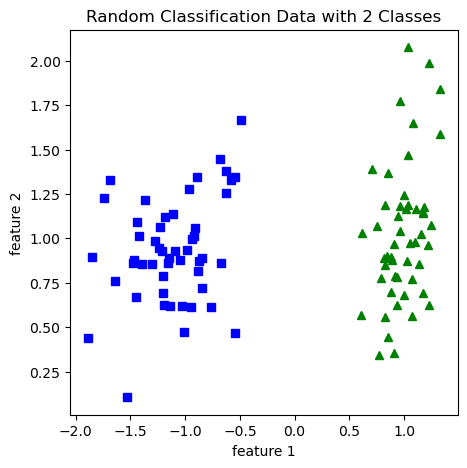

In [515]:
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)

# There are 2 features, n=2. There are 2 classes, blue and green.

plt.figure(figsize=(5,5))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 Classes')
plt.show()


### Sigmoid function
The Sigmoid Function squishes all its inputs (values on the x-axis) between 0 and 1 as we can see on the y-axis in the graph below.
$$S(x) = \frac{1}{1 + e^{-x}}$$

The range of inputs for this function is the set of all Real Numbers and the range of outputs is between 0 and 1.

<p align="center">
    <img title="Sigmoid function plot" alt="Sigmoid function plot" src="https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg">
</p>


In [502]:
#>> Sigmoid Function
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

# As z increases towards +infinity => output gets closer to 1
# As z decreases towards -infinity => output gets closer to 0

### Hypothesis function
For Linear Regression, we had the hypothesis `y_hat = w.X + b`, whose output range was the set of all real numbers.

Now, for Logistic Regression our hypothesis is — `y_hat = sigmoid(w.X + b)`, whose output range is between 0 and 1 because by applying a sigmoid function, we always output a number between 0 and 1.

$$\hat{y} = \frac{1}{1 + e^{-(w \cdot x + b)}}$$

There are many continuous functions which output values between 0 and 1. We choose the Logistic Function since the Sigmoid function's use case is natural given our set of assumptions. There exists a broader class of algorithms called **Generalized Linear Models** of which Logistic Regression is a special case.


### Loss/Cost Function
For every parametric ML algorithm, we need a loss function, which we want to minimize (find the global minimum of) to determine the optimal parameters(`w` and `b`) which will help us make the best predictions. For Linear Regression, we had the mean squared error as the loss function (but that was a regression problem).

For a binary classification problem, we need to be able to output the probability of $y$ being 1 (e.g., tumor is benign for example), then we can determine the probability of $y$ being 0 (e.g., tumor is malignant) or vice versa.

So, we assume that the values that our hypothesis ($\hat{y}$) outputs between 0 and 1, is a probability of $y$ being 1, then the probability of $y$ being 0 will be ($1 - \hat{y}$). Remember that: $y$ is only 0 or 1; whereas $\hat{y}$ is a number between 0 and 1.

More formally, the probability of $y=1$ given $X$, parameterized by $w$ and $b$ is $\hat{y}$ (hypothesis). Then, logically the probability of $y=0$ given $X$, parameterized by $w$ and $b$ should be $1-\hat{y}$. This can be written as:
    $$P(y = 1 | X; w, b) = \hat{y}$$
    $$P(y = 0 | X; w, b) = 1 - \hat{y}$$

Then, based on our assumptions, we can calculate the log-likelihood of parameters using the above two equations and consequently determine the loss function which we have to minimize. The following is the **Binary Coss-Entropy Loss** or the **Log Loss function** —
$$J(w,b) = \frac{1}{m} \sum_{i=1}^{m} L(\hat{y}^{(i)}, y^{(i)}) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})]$$

$J(w,b)$ is the overall cost/loss of the training set and $L$ is the cost for $i$-th training example.

By looking at the Loss function, we can see that loss approaches 0 when we predict correctly (i.e, when $y=0$ & $\hat{y}=0$ or, $y=1$ & $\hat{y}=1$) and the loss function approaches infinity if we predict incorrectly (i.e, when $y=0$ but $\hat{y}=1$ or, $y=1$ but $\hat{y}=1$).


In [503]:
#>> Loss Function
def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

### Gradient Descent Algorithm
Used to find the parameters, `weights` and `bias`. Then, measure accuracy and plot the decision boundary for a linearly separable dataset and a non-linearly separable dataset.

Now that we know our hypothesis function and the loss function, all we need to do is use the Gradient Descent Algorithm to find the optimal values of our parameters like this (`lr` = learning rate) —
$$w := w - lr * dw$$
$$b := b - lr * db$$

where, $dw$ is the partial derivative of the Loss function with respect to $w$ and $db$ is the partial derivative of the Loss function with respect to $b$.


In [504]:
#>> Function using gradient descent to calculate dw & db
def gradients(X, y, y_hat):
    """
    X = Input
    y = true/target value
    y_hat = hypothesis/predictions
    w = weights (parameter)
    b = bias (parameter)
    m = number of training examples.
    """
    
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db


### Decision Boundary
Now, we want to know how our hypothesis ($\hat{y}$) is going to make predictions of whether $y=1$ or $y=0$. The way we defined hypothesis is the probability of $y$ being 1 given $X$ and parameterized by $w$ and $b$.

So, we will say that it will make a prediction of —
- $y=1$ when `y_hat` ≥ 0.5
- $y=0$ when `y_hat` < 0.5

Looking at the graph of the sigmoid function, we see that for —
- `y_hat` ≥ 0.5, `z` or `w.X + b` ≥ 0
- `y_hat` < 0.5, `z` or `w.X + b` < 0

which means, we make a prediction for —
- $y=1$ when `w.X + b` ≥ 0
- $y=0$ when `w.X + b` < 0

So, `w.X + b = 0` is going to be our Decision boundary. The following code for plotting the Decision Boundary only works when we have only two features in $X$.


In [505]:
#>> Normalize Function
# Function to normalize the inputs
def normalize(X):    
    # X --> Input
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape

    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)

    return X

#>> Train Function
# The train function includes initializing the weights & bias and the training loop with mini-batch gradient descent.
def train(X, y, bs, epochs, lr):
    # X --> Input
    # y --> true/target value
    # bs --> Batch Size
    # epochs --> Number of iterations
    # lr --> Learning rate        
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    y = y.reshape(m,1)              # Reshaping y
    x = normalize(X)                # Normalizing the inputs
    losses = []                     # Empty list to store losses
    
    # Training loop
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss w.r.t parameters
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    # Returning weights, bias and losses(List)
    return w, b, losses

#>> Predict Function
def predict(X):
    # X --> Input    
    x = normalize(X)            # Normalizing the inputs
    
    # Calculating predictions (y_hat)
    preds = sigmoid(np.dot(X, w) + b)
    
    # Empty List to store predictions.
    pred_class = []
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)


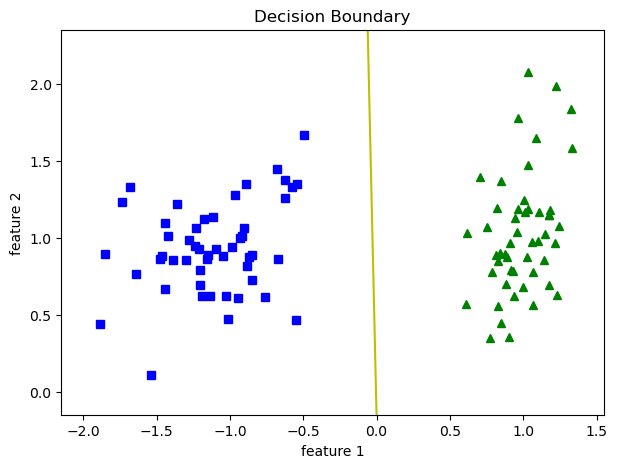

In [506]:
def plot_decision_boundary(X, w, b):
    # X --> Inputs; w --> weights; b --> bias
    
    # The line is y=mx+c
    # So, equate mx+c = w.X + b & solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
    
    # Set plot axis bounds based on data values
    ub_x = X[:, 0].max().round(1) + 0.25
    lb_x = X[:, 0].min().round(1) - 0.25
    ub_y = X[:, 1].max().round(1) + 0.25
    lb_y = X[:, 1].min().round(1) - 0.25

    fig = plt.figure(figsize=(7, 5))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlim([lb_x, ub_x])
    plt.ylim([lb_y, ub_y])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')
    plt.show()

#>> Training and Plotting Decision Boundary
w, b, l = train(X, y, bs=100, epochs=1000, lr=0.01)
plot_decision_boundary(X, w, b)


### Testing

#### Calculating Accuracy
We check how many examples did we get right and divide it by the total number of examples. From the code below, we get an accuracy of 100%. We can also see from the above decision boundary graph that we are able to separate the green and blue classes perfectly.


In [507]:
#>> Function to compute decision boundary accuracy
def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy

accuracy(y, y_hat=predict(X))
# Accuracy score of 1 => 100% accuracy.

1.0

#### Testing on Non-linearly Separable Data
Let's test out our code for data that is not linearly separable.

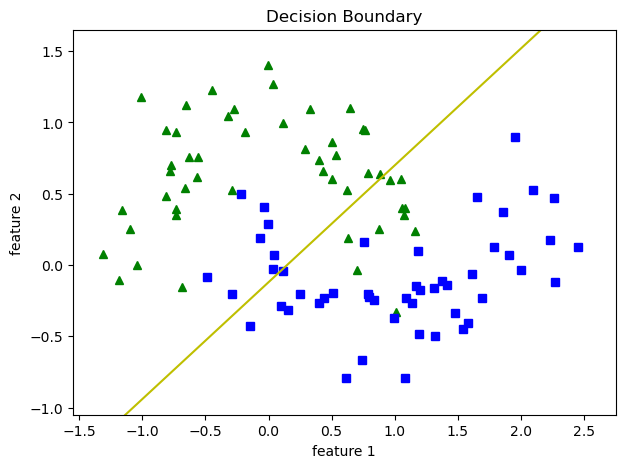

Accuracy of classification: 82.0%


In [511]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.24)

# Set plot axis bounds based on data values
ub_x = (X.max() + 0.5).round(1)
lb_x = (X.min() - 0.5).round(1)

#>> Training and Plotting Decision Boundary
w, b, l = train(X, y, bs=100, epochs=1000, lr=0.01)
plot_decision_boundary(X, w, b)

# Test accuracy
print(f'Accuracy of classification: {accuracy(y, predict(X)) * 100}%')


Since Logistic Regression is only a linear classifier, we were able to put a decent straight line which was able to separate as many blues and greens from each other as possible.


### Important Insights
When training the data, there were NaN values in the losses list, this indicates that the inputs are not normalized (is the reason losses were full of NaNs).

If you're getting NaN values or overflow during training, then do the following:
1) Normalize the data — `X`
2) Lower the learning rate — `lr`

### Resources
- [Bank Marketing Data Description](http://archive.ics.uci.edu/dataset/222/bank+marketing)
- [Wiki: Sigmoid Function](https://en.wikipedia.org/wiki/Sigmoid_function)
- [Introduction To Sigmoid Function](https://machinelearningmastery.com/a-gentle-introduction-to-sigmoid-function/)
- [Log-likelihood Explainer](https://www.statlect.com/glossary/log-likelihood)
- [Understanding the Logistic Regression and likelihood](https://stats.stackexchange.com/questions/304988/understanding-the-logistic-regression-and-likelihood)



→
